In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import datetime
import numpy as np
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 

flights = pd.read_csv('flights.csv')

In [2]:
display(flights.sample(10))
display(flights.info())

,flight_id,actual_departure,departure_city,arrival_city,model,purchased_tickets,business,economy,amount_tickets,minute_in_way,fuel_consumption,profit
20,136729,2017-01-29T09:29:00Z,Anapa,Belgorod,Sukhoi Superjet-100,88,11,77,695400.0,50.0,58630.5250,6.367695e+05
5,136620,2017-02-17T09:30:00Z,Anapa,Belgorod,Sukhoi Superjet-100,79,9,70,613500.0,49.0,57457.9145,5.560421e+05
15,136838,2017-01-24T09:30:00Z,Anapa,Belgorod,Sukhoi Superjet-100,86,10,76,670200.0,51.0,59803.1355,6.103969e+05
108,136249,2017-02-14T10:08:00Z,Anapa,Moscow,Boeing 737-300,123,12,111,1800600.0,98.0,162425.2000,1.638175e+06
41,136819,2017-01-04T09:29:00Z,Anapa,Belgorod,Sukhoi Superjet-100,96,12,84,759000.0,50.0,58630.5250,7.003695e+05
10,136645,2017-01-05T09:29:00Z,Anapa,Belgorod,Sukhoi Superjet-100,82,9,73,633000.0,51.0,59803.1355,5.731969e+05
32,136669,2017-01-17T09:26:00Z,Anapa,Belgorod,Sukhoi Superjet-100,95,12,83,752700.0,51.0,59803.1355,6.928969e+05
19,136769,2017-02-10T09:30:00Z,Anapa,Belgorod,Sukhoi Superjet-100,88,11,77,696000.0,51.0,59803.1355,6.361969e+05
21,136855,2017-01-11T12:07:00Z,Anapa,Belgorod,Sukhoi Superjet-100,87,12,75,702300.0,50.0,58630.5250,6.436695e+05
110,136131,2017-01-28T10:07:00Z,Anapa,Moscow,Boeing 737-300,124,12,112,1812800.0,99.0,164082.6000,1.648717e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          118 non-null    int64  
 1   actual_departure   118 non-null    object 
 2   departure_city     118 non-null    object 
 3   arrival_city       118 non-null    object 
 4   model              118 non-null    object 
 5   purchased_tickets  118 non-null    int64  
 6   business           118 non-null    int64  
 7   economy            118 non-null    int64  
 8   amount_tickets     118 non-null    float64
 9   minute_in_way      118 non-null    float64
 10  fuel_consumption   118 non-null    float64
 11  profit             118 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 11.2+ KB


None

В данном датасете есть информация по 118 рейсам, совершенным зимой 2017 года из Анапы. 7 числовых столбцов(не считая flight_id) и 4 строковых(1 из них дата вылета). Сразу же отредактируем формат даты, отбросим из неё информацию о времени.

In [3]:
flights.actual_departure = flights.actual_departure.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())

Посмотрим общую статистику для числовых столбцов.

In [4]:
display(flights.describe())

,flight_id,purchased_tickets,business,economy,amount_tickets,minute_in_way,fuel_consumption,profit
count,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,1.180000e+02
mean,136533.440678,101.652542,10.788136,90.864407,1.176506e+06,74.957627,112094.491758,1.064411e+06
std,261.971994,14.295643,1.395057,14.028003,4.794251e+05,24.992783,53607.187615,4.273379e+05
min,136119.000000,64.000000,6.000000,54.000000,5.310000e+05,49.000000,57457.914500,4.723695e+05
25%,136286.250000,95.000000,10.000000,83.000000,7.464000e+05,50.000000,58630.525000,6.877695e+05
50%,136528.500000,97.000000,11.000000,85.500000,1.081650e+06,74.500000,111114.167750,9.700510e+05
75%,136768.500000,111.750000,12.000000,101.750000,1.625850e+06,100.000000,165740.000000,1.461767e+06
max,136956.000000,130.000000,12.000000,118.000000,1.886000e+06,103.000000,170712.200000,1.720260e+06


In [5]:
plt.rcParams['figure.figsize'] = (10,7)
def statistics(column):
    graph=pd.DataFrame({'Рейсы до Москвы' : list(flights[column][flights.arrival_city=='Moscow']),
                           'Рейсы до Белгорода' : list(flights[column][flights.arrival_city=='Belgorod'])})
    graph.plot(kind='hist', bins=59, alpha = 0.7)
    print('Общая статистика:')
    display(flights[column].describe())
    print('Статистика рейсов до Москвы:')
    display(flights[column][flights.arrival_city=='Moscow'].describe())
    print('Статистика рейсов до Белгорода:')
    display(flights[column][flights.arrival_city=='Belgorod'].describe())
    

## Рассмотрим распределение признаков

Столбец flight_id является идентификатором рейса и не нуждается в анализе.
Целевой переменной является столбец profit, ра него мы и посмотрим в первую очередь. 

### Profit

Общая статистика:


count    1.180000e+02
mean     1.064411e+06
std      4.273379e+05
min      4.723695e+05
25%      6.877695e+05
50%      9.700510e+05
75%      1.461767e+06
max      1.720260e+06
Name: profit, dtype: float64

Статистика рейсов до Москвы:


count    5.900000e+01
mean     1.477117e+06
std      1.324454e+05
min      1.232260e+06
25%      1.379117e+06
50%      1.464517e+06
75%      1.574317e+06
max      1.720260e+06
Name: profit, dtype: float64

Статистика рейсов до Белгорода:


count        59.000000
mean     651705.694449
std       65702.711571
min      472369.475000
25%      608133.169750
50%      687769.475000
75%      705496.864500
max      707842.085500
Name: profit, dtype: float64

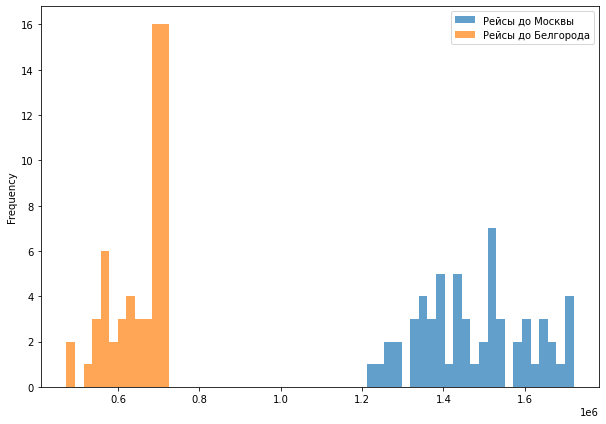

In [6]:
statistics('profit')

По графикy видно, что наибольшая выручка от рейсов в Москву, а у 2х рейсов в Белгород Прибыль составляет менее 500000.

## Arrival_city и Model
Посмотрим как распределены города прибытия и модели самолетов. Нам известно, что каждый день из Анапы вылетает по 2 самолета: 1й - в Москву, 2й - в Белгород. Давайте посмотрим какие модели куда летают.

<AxesSubplot:xlabel='arrival_city', ylabel='count'>

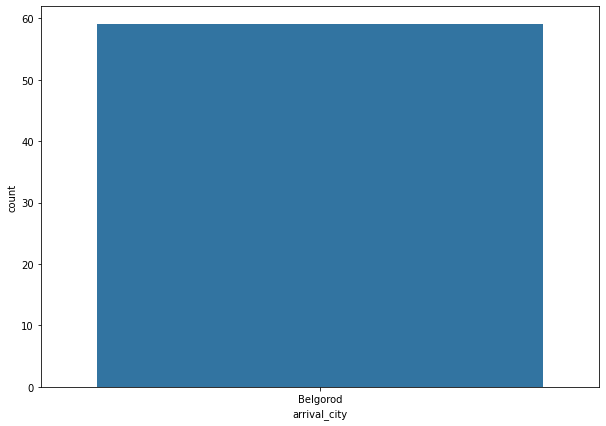

In [7]:
sns.countplot(flights.loc[:,'arrival_city'][flights.model == 'Sukhoi Superjet-100'])

<AxesSubplot:xlabel='arrival_city', ylabel='count'>

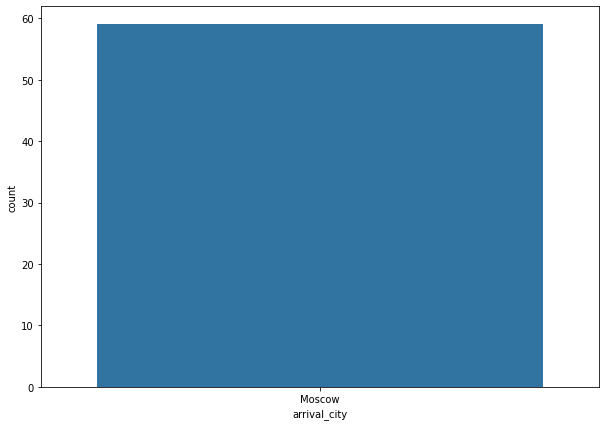

In [8]:
sns.countplot(flights.loc[:,'arrival_city'][flights.model == 'Boeing 737-300'])

Значит все самолеты модели Boeing 737-300 совершают рейсы в Москву, а модель Sukhoi Superjet-100 летает в Белгород. Давайте посмотрим как сильно различаются показатели прибыли по городам.

(array([0, 1]), [Text(0, 0, 'Belgorod'), Text(1, 0, 'Moscow')])

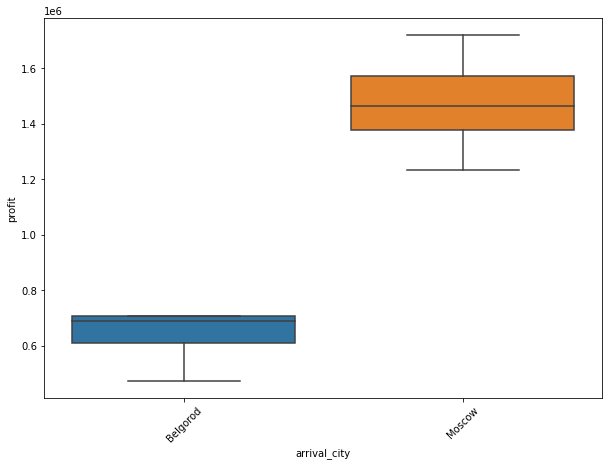

In [9]:
sns.boxplot(x='arrival_city', y='profit', 
               data = flights)
plt.xticks(rotation=45)

По графику видно, как сильно отличается прибыльность рейсов в Москву и Белгород.

## Purchased_tickets 
Так как максимальное количество мест в самолетах разное, лучше посмотрим на распределение этого признака как по каждому из самолетов, так и общее. Вместе с этим посмотрим, как часто самолет заполнялся менее чем на 75 процентов.

Общая статистика:


count    118.000000
mean     101.652542
std       14.295643
min       64.000000
25%       95.000000
50%       97.000000
75%      111.750000
max      130.000000
Name: purchased_tickets, dtype: float64

Статистика рейсов до Москвы:


count     59.000000
mean     113.118644
std        8.896115
min       97.000000
25%      107.000000
50%      112.000000
75%      120.000000
max      130.000000
Name: purchased_tickets, dtype: float64

Статистика рейсов до Белгорода:


count    59.000000
mean     90.186441
std       8.101670
min      64.000000
25%      86.500000
50%      95.000000
75%      97.000000
max      97.000000
Name: purchased_tickets, dtype: float64

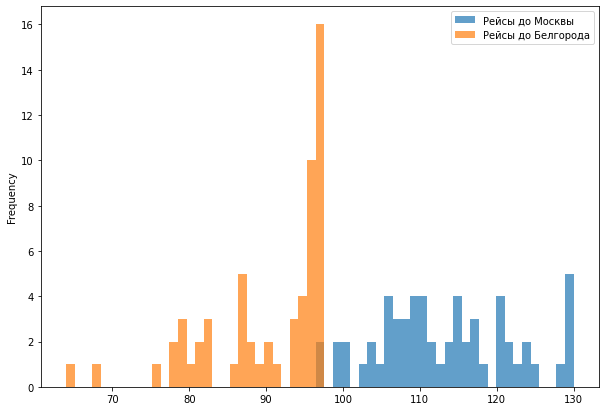

In [10]:
statistics('purchased_tickets')

In [11]:
print(f'Количество рейсов до Москвы, заполненных менее чем на 75%: {sum(flights.purchased_tickets[flights.arrival_city=="Moscow"] < int(130*0.75))}')
print(f'Количество рейсов до Белгорода, заполненных менее чем на 75%: {sum(flights.purchased_tickets[flights.arrival_city=="Belgorod"] < int(97*0.75))}')

Количество рейсов до Москвы, заполненных менее чем на 75%: 0
Количество рейсов до Белгорода, заполненных менее чем на 75%: 2


2 малозаполненных рейса на Белгород. Давайте посмотрим, входят ли эти 2 рейса в число самых малоприбыльных.

In [12]:
display(flights[(flights['purchased_tickets'] < int(97*0.75)) & (flights['profit'] < 500000)])


,flight_id,actual_departure,departure_city,arrival_city,model,purchased_tickets,business,economy,amount_tickets,minute_in_way,fuel_consumption,profit
0,136807,2017-02-23,Anapa,Belgorod,Sukhoi Superjet-100,68,8,60,531000.0,50.0,58630.5250,472369.4750
1,136642,2017-01-30,Anapa,Belgorod,Sukhoi Superjet-100,64,10,54,531000.0,49.0,57457.9145,473542.0855


Да, 2 самых малоприбыльных рейса являются также и самыми плохо заполненными. 

## Business and economy
Рассмотрим распределение этих 2х признаков

<AxesSubplot:xlabel='model', ylabel='economy'>

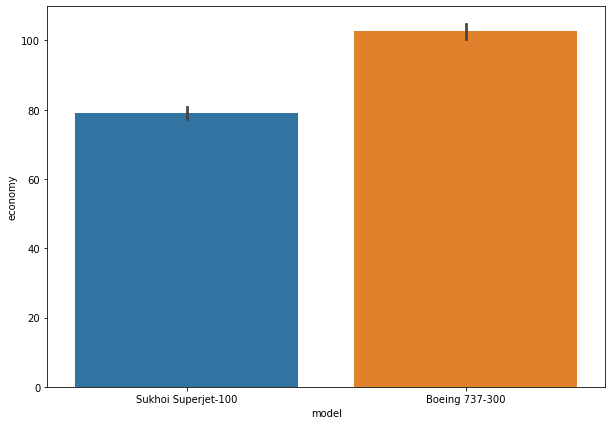

In [13]:
sns.barplot(x=flights.model, y = flights.economy)

<AxesSubplot:xlabel='model', ylabel='business'>

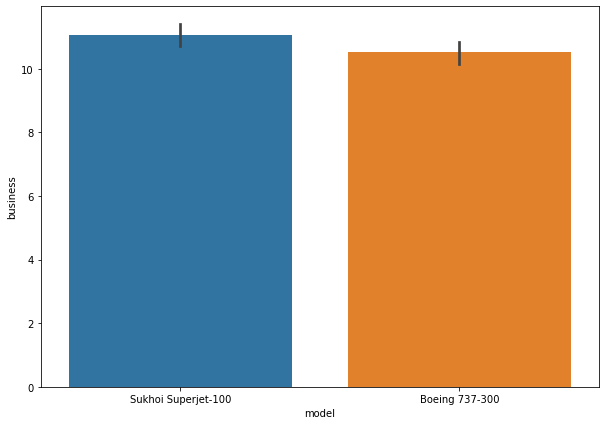

In [14]:
sns.barplot(x=flights.model, y = flights.business)

Давайте посмотрим, как сильно влияют на прибыль количество купленных билетов эконом и бизнес класса.

<AxesSubplot:xlabel='profit', ylabel='business'>

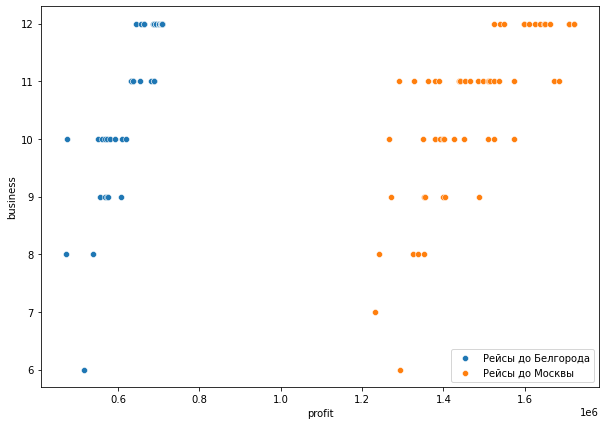

In [15]:
sns.scatterplot(data=flights[flights.arrival_city=='Belgorod'], x='profit', y='business', label = 'Рейсы до Белгорода' )
sns.scatterplot(data=flights[flights.arrival_city=='Moscow'], x='profit', y='business', label = 'Рейсы до Москвы')

<AxesSubplot:xlabel='profit', ylabel='economy'>

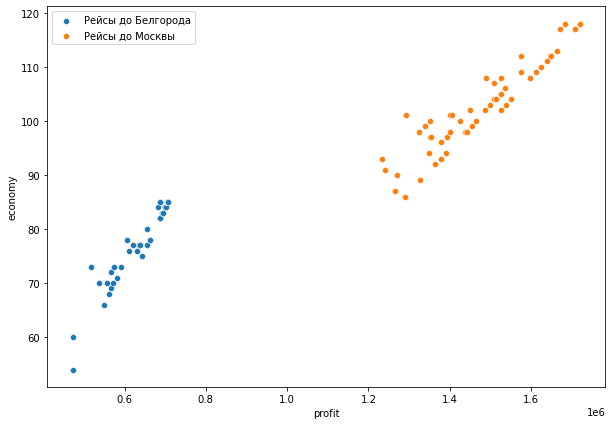

In [16]:
sns.scatterplot(data=flights[flights.arrival_city=='Belgorod'], x='profit', y='economy', label = 'Рейсы до Белгорода' )
sns.scatterplot(data=flights[flights.arrival_city=='Moscow'], x='profit', y='economy', label = 'Рейсы до Москвы')

По графикам четко видно, что основная прибыль в большинстве своем зависит от количества проданных билетов эконом класса, а зависимость количества проданных билетов бизнес класса сильнее выражена в рейсах до Белгорода. 

## Amount_tickets 
Теперь давайте посмотрим, как распределена общая стоимость билетов с разделением по городам.

Общая статистика:


count    1.180000e+02
mean     1.176506e+06
std      4.794251e+05
min      5.310000e+05
25%      7.464000e+05
50%      1.081650e+06
75%      1.625850e+06
max      1.886000e+06
Name: amount_tickets, dtype: float64

Статистика рейсов до Москвы:


count    5.900000e+01
mean     1.642576e+06
std      1.318786e+05
min      1.398000e+06
25%      1.543200e+06
50%      1.628600e+06
75%      1.738400e+06
max      1.886000e+06
Name: amount_tickets, dtype: float64

Статистика рейсов до Белгорода:


count        59.000000
mean     710435.593220
std       65835.266628
min      531000.000000
25%      667350.000000
50%      746400.000000
75%      765300.000000
max      765300.000000
Name: amount_tickets, dtype: float64

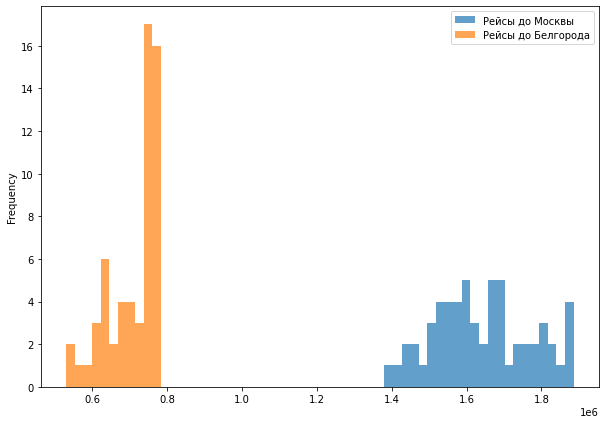

In [17]:
statistics('amount_tickets')

Достаточно большой разрыв в стоимости билетов между 800тыс. и ~1,4млн. Рейсы с общей стоимостью менее 800тыс летят в Белгород, а стоимостью выше 1,4млн в Москву. Скорее всего это связано с тем, что расстояние до Москвы больше чем до Белгорода. Давайте в этом убедимся.

## Minute_in_way

Общая статистика:


count    118.000000
mean      74.957627
std       24.992783
min       49.000000
25%       50.000000
50%       74.500000
75%      100.000000
max      103.000000
Name: minute_in_way, dtype: float64

Статистика рейсов до Москвы:


count     59.000000
mean      99.830508
std        0.985280
min       98.000000
25%       99.000000
50%      100.000000
75%      100.000000
max      103.000000
Name: minute_in_way, dtype: float64

Статистика рейсов до Белгорода:


count    59.000000
mean     50.084746
std       0.650945
min      49.000000
25%      50.000000
50%      50.000000
75%      50.500000
max      51.000000
Name: minute_in_way, dtype: float64

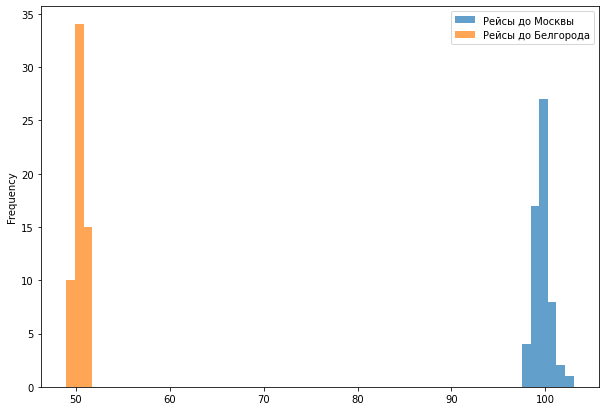

In [18]:
statistics('minute_in_way')

Среднее время в пути до Белгорода около 50 минут, тем временем до Москвы лететь в 2 раза дольше. Значит и на топливо до Москвы будет большие траты.

## Fuel_consumption
Рассмотрим столбец расходов на топливо.

Общая статистика:


count       118.000000
mean     112094.491758
std       53607.187615
min       57457.914500
25%       58630.525000
50%      111114.167750
75%      165740.000000
max      170712.200000
Name: fuel_consumption, dtype: float64

Статистика рейсов до Москвы:


count        59.000000
mean     165459.084746
std        1633.003614
min      162425.200000
25%      164082.600000
50%      165740.000000
75%      165740.000000
max      170712.200000
Name: fuel_consumption, dtype: float64

Статистика рейсов до Белгорода:


count       59.000000
mean     58729.898771
std        763.304420
min      57457.914500
25%      58630.525000
50%      58630.525000
75%      59216.830250
max      59803.135500
Name: fuel_consumption, dtype: float64

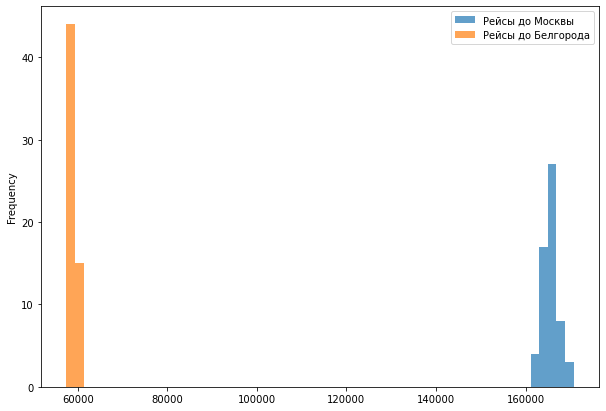

In [19]:
statistics('fuel_consumption')

<AxesSubplot:xlabel='model', ylabel='fuel_consumption'>

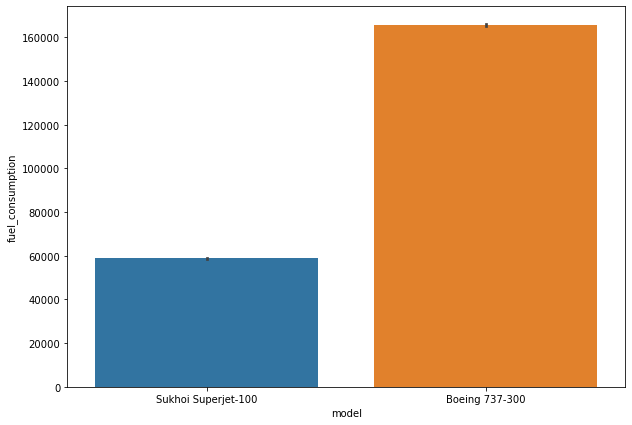

In [20]:
sns.barplot(x=flights.model, y = flights.fuel_consumption)

Расходы на топливо у Boeing, который летает в Москву, значительно больше, чем у Sukhoi Superjet, который летит до Белгорода.

# Выводы и рекомендации: 

1. Расчет прибыли производился по простейшей формуле: сумма выкупленных билетов - расходы на топливо на рейс.
2. Рейсы, которые я предлагаю убрать по причине малой заполненности и небольшой прибыли:

In [21]:
display(flights[['flight_id','purchased_tickets','profit']][flights['profit']<500000])
print(f'При этом средняя прибыльность рейсов составляет: {round(np.mean(flights.profit))}')

,flight_id,purchased_tickets,profit
0,136807,68,472369.4750
1,136642,64,473542.0855


При этом средняя прибыльность рейсов составляет: 1064411


3.Большинство рейсов в Белгород не приносят большой прибыли. Поэтому можно подумать либо о полной смене направления, либо частичной(один день - самолет летит в Белгород, а на следующий - в другой город).
